In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

In [2]:
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\beatle.jpg')

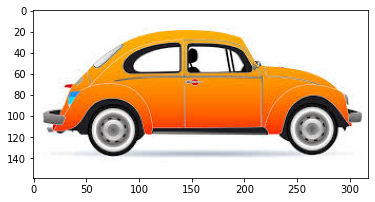

In [3]:
plt.imshow(input_image)

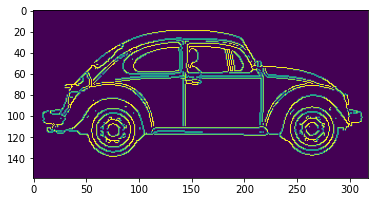

In [7]:
    edge = cv2.Canny(input_image,200,200)
    plt.imshow(edge)
    contours,heirarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(edge)


In [4]:
## finding edges
def get_image_countours(input_image):
    edge = cv2.Canny(input_image,200,200)
    plt.imshow(edge)
    contours,heirarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(edge)
    return contours,heirarchy

Number of Contours:  110


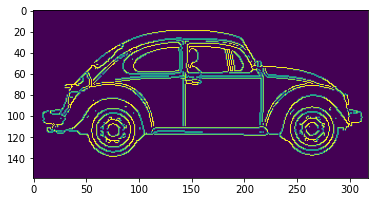

In [8]:
## finding contours
contours,heirarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print('Number of Contours: ',len(contours))
plt.imshow(edge)

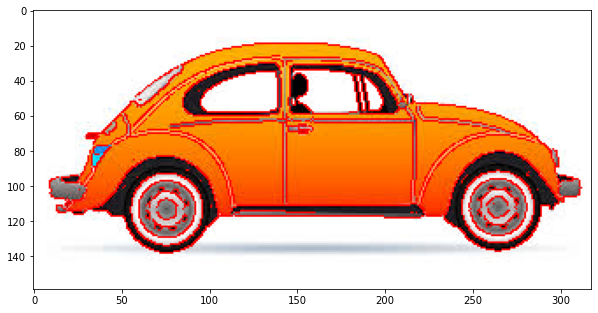

In [9]:
## Draw contours on the image
cv2.drawContours(input_image,contours,-1,(255,0,0),1)
plt.figure(figsize = (10,12))
plt.imshow(input_image)

### Sorting Contours 
##### Good for image processing and object detection

In [10]:
input_image_sort = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\bunchofshapes.jpg')

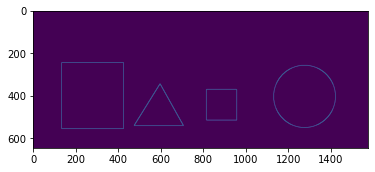

In [11]:
contours,hierarchy = get_image_countours(input_image_sort)

In [12]:
## Sorting by area
def calc_area(contours):
    area = []
    for cnt in contours:
        ar = cv2.contourArea(cnt)
        area.append(ar)
    return area

print('contour area before sort: ', calc_area(contours))

sort = sorted(contours,key = cv2.contourArea,reverse = False)
print('contour area after sort: ',calc_area(sort))

contour area before sort:  [20585.5, 20587.5, 22673.5, 22903.5, 66336.5, 66573.5, 89918.0, 89920.0]
contour area after sort:  [20585.5, 20587.5, 22673.5, 22903.5, 66336.5, 66573.5, 89918.0, 89920.0]


In [13]:
## finding x and y coordinates and contour centroid
def x_cor(contours):
    if cv2.contourArea(contours)>10:
        M = cv2.moments(contours) 
        return (int(M['m10']/M['m00']))

## Labelling contours
def label_center(input_image,c,i):
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    ## Draw circle
    cv2.circle(input_image,(cx,cy),10,(255,0,0),-1)
    return input_image


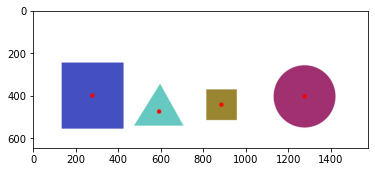

In [16]:
## compute center
for (i,c) in enumerate(contours):
    orig_ = label_center(input_image_sort,c,i)
plt.imshow(input_image_sort)

In [17]:
## Left to right sorting
cont_left_to_right = sorted(contours,key = x_cor,reverse=False)


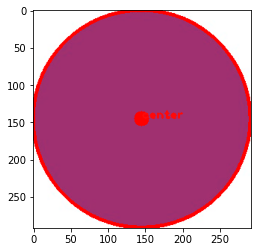

In [19]:
## Labelling
for (i,c) in enumerate(cont_left_to_right):
    cv2.drawContours(input_image_sort,[c],-1,(255,0,0),3)
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    cv2.putText(input_image_sort,'center',(cx,cy),cv2.FONT_HERSHEY_PLAIN,1,(255,9,9),2)
    plt.imshow(input_image_sort)
    (x,y,w,h)  = cv2.boundingRect(c)
    
    ## cropping
    cropped = input_image_sort[y:y+h,x:x+w]
    plt.imshow(cropped)